In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [4]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

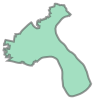

In [5]:
zipcodes.loc[0, 'geometry']

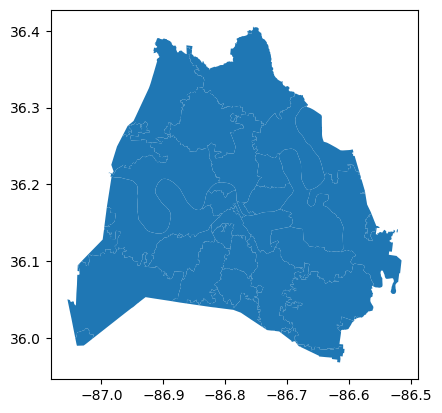

In [6]:
zipcodes.plot();

/Users/amy/anaconda3/envs/geospatial/lib/python3.10/site-packages/geopandas/plotting.py:955: UserWarning: Glyph 9 (	) missing from current font.
  plt.draw()
/Users/amy/anaconda3/envs/geospatial/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


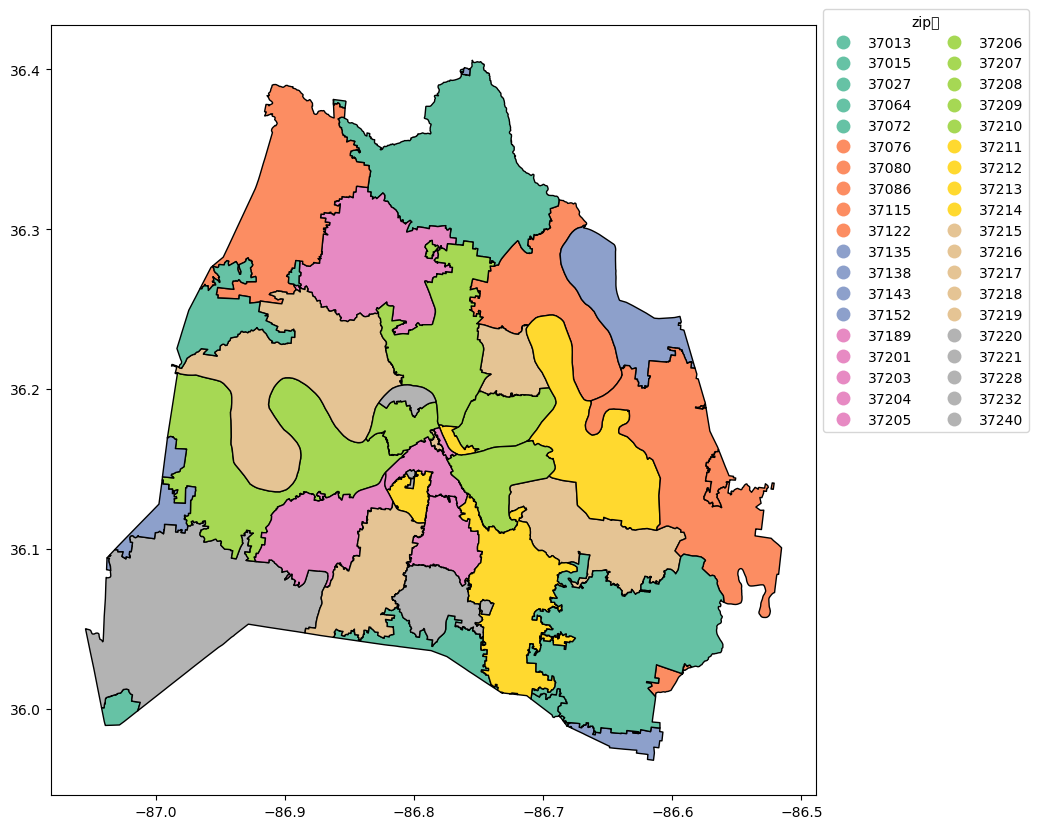

In [7]:

leg_kwds = {'title': 'zip	', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [8]:
fountains =gpd.read_file('../data/public_hydration_systems.geojson')
print(fountains.shape)
fountains

(73, 10)


,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)
...,...,...,...,...,...,...,...,...,...,...
68,Harpeth River Greenway,Morton Mill Rd at Old Harding Pike,Y,0,36.05899273,N,1,-86.94508441,Standard/ADA/Bottle Filler,POINT (-86.94508 36.05899)
69,Harpeth River Greenway,Butler Field Trail Head,Y,0,36.05133033,N,1,-86.91617134,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133)
70,River Landing,Greenway @ Victory & Titans Ways,N,0,36.16412161,Y,1,-86.77223047,Standard/ADA,POINT (-86.77223 36.16412)
71,Ascend Amphiteater Water Fountain,Building,N,0,36.16014227,N,1,-86.77120998,Standard/ADA/Bottle Filler,POINT (-86.77121 36.16014)


In [9]:
fountains.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       73 non-null     object  
 1   location   65 non-null     object  
 2   dog        73 non-null     object  
 3   objectid   73 non-null     object  
 4   lon        73 non-null     object  
 5   ada        73 non-null     object  
 6   cnt        73 non-null     object  
 7   lat        73 non-null     object  
 8   feat_type  73 non-null     object  
 9   geometry   73 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 5.8+ KB


In [10]:
fountains_by_zip = gpd.sjoin(fountains, zipcodes, predicate = 'within')

In [11]:
fountains_by_zip.head()

,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry,index_right,zip,po_name
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250),20,37080,JOELTON
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090),7,37221,NASHVILLE
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310),7,37221,NASHVILLE
29,Edwin Warner Dog Park Water Fountain,Dog Park,Y,46595,36.05195562,N,1,-86.90162012,Dog Only,POINT (-86.90162 36.05196),7,37221,NASHVILLE
30,Edwin Warner Concession Water Fountain,WNSL Concessions,N,46597,36.04998346,Y,1,-86.8981744,Standard/ADA,POINT (-86.89817 36.04998),7,37221,NASHVILLE


In [12]:
fountains_by_zip['zip'].value_counts()

zip
37209    8
37221    8
37201    6
37206    6
37208    5
37207    5
37214    4
37013    4
37212    3
37218    3
37210    2
37205    2
37213    2
37228    2
37204    2
37217    2
37211    2
37203    2
37076    1
37216    1
37115    1
37215    1
37080    1
Name: count, dtype: int64

In [13]:
fountains_in_37209 = fountains_by_zip.loc[fountains_by_zip['zip'] == '37209']
fountains_in_37209.shape

(8, 13)

In [14]:
fountains_in_37209.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 8 entries, 3 to 67
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         8 non-null      object  
 1   location     6 non-null      object  
 2   dog          8 non-null      object  
 3   objectid     8 non-null      object  
 4   lon          8 non-null      object  
 5   ada          8 non-null      object  
 6   cnt          8 non-null      object  
 7   lat          8 non-null      object  
 8   feat_type    8 non-null      object  
 9   geometry     8 non-null      geometry
 10  index_right  8 non-null      int64   
 11  zip          8 non-null      object  
 12  po_name      8 non-null      object  
dtypes: geometry(1), int64(1), object(11)
memory usage: 896.0+ bytes


In [15]:
fountains_in_37209[["lon","lat"]]=fountains_in_37209[["lon","lat"]].astype(float)

/Users/amy/anaconda3/envs/geospatial/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [25]:
fountains_in_37209.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 8 entries, 3 to 67
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         8 non-null      object  
 1   location     6 non-null      object  
 2   dog          8 non-null      object  
 3   objectid     8 non-null      object  
 4   lon          8 non-null      float64 
 5   ada          8 non-null      object  
 6   cnt          8 non-null      object  
 7   lat          8 non-null      float64 
 8   feat_type    8 non-null      object  
 9   geometry     8 non-null      geometry
 10  index_right  8 non-null      int64   
 11  zip          8 non-null      object  
 12  po_name      8 non-null      object  
dtypes: float64(2), geometry(1), int64(1), object(9)
memory usage: 896.0+ bytes


In [16]:
polygon37209 = zipcodes.loc[zipcodes['zip'] == '37209']
polygon37209.shape

(1, 3)

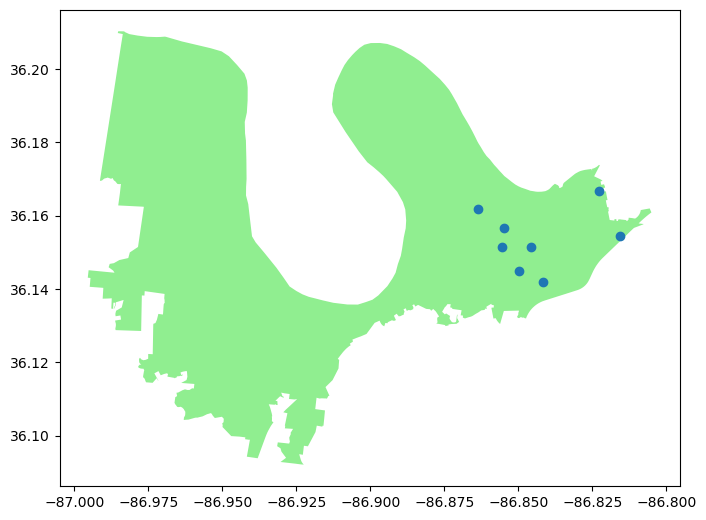

In [17]:
ax = polygon37209.plot(figsize = (8, 10), color = 'lightgreen')
fountains_in_37209.plot( ax = ax);
plt.show();

In [18]:
polygon37209.geometry.centroid

/var/folders/z_/qdwpyw154zlbydznn1lhbp2m0000gn/T/ipykernel_62191/283130122.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37209.geometry.centroid


12    POINT (-86.91816 36.15605)
dtype: geometry

In [19]:
center = polygon37209.geometry.centroid[12]
print(center)

POINT (-86.91816342256455 36.15604558838379)


/var/folders/z_/qdwpyw154zlbydznn1lhbp2m0000gn/T/ipykernel_62191/3183202573.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37209.geometry.centroid[12]


In [20]:
display(polygon37209)

,zip,po_name,geometry
12,37209,NASHVILLE,"MULTIPOLYGON (((-86.97543 36.20877, -86.97221 ..."


In [21]:
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.15604558838379, -86.91816342256455]


In [22]:
map_37209 = folium.Map(location =  area_center, zoom_start = 12)
map_37209

In [26]:
#draw our zip code area: map_37209
map_37209 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37209).add_to(map_37209)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in fountains_in_37209.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['name'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
       location=loc,
        popup = pop, icon = icon) 

    marker.add_to(map_37209)
map_37209.save('../maps/map_37209.html')

#display our map
map_37209

In [24]:

fountain_nash = folium.Map(location = [36.1612, -86.7775], zoom_start = 12)

for ind, row in fountains_in_37209.iterrows():
    point = [row['lat'], row['lon']]
    popup = row['name']
    icon = folium.Icon(color = 'darkpurple', icon = 'tint', prefix = 'fa') # here's where the icon gets customized
    folium.Marker(point, popup = popup, icon = icon).add_to(fountain_nash)
fountain_nash